## 波束地距分辨率的变化

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体 
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 

In [2]:
#% 参数设置
Re = 6368e3; #% 本地地球半径
h  = 800e3;  #% 平台距地面高度
dr = 13.6  ; #% 斜距分辨率

#% 设置要扫描的所有地距
G_all = np.linspace( 255, 425, 101 )*1e3;
Ng    = G_all.size

#% 初始化结果
R0_all  = np.zeros( Ng ); #% 斜距
thi_all = np.zeros( Ng ); #% 入射角
dg_all  = np.zeros( Ng ); #% 地距分辨率

#%% 迭代
for cg in range(Ng):
    
    #% 提取地距
    G = G_all[ cg ]
    
    #% 计算地心角
    betae = G/Re;
    
    #% 计算斜距R0
    temp = ( Re + h )**2 + Re**2 - 2*( Re + h )*Re*np.cos( betae );
    R0   = np.sqrt( temp );
    
    #% 计算星下点离线角
    temp = Re/(R0/np.sin(betae));
    thn  = np.arcsin( temp );
    
    #% 计算入射角
    thi = betae + thn;
    
    #% 计算地距分辨率
    dg = dr/np.sin(thi);
    
    #% 结果记录
    R0_all [ cg ] = R0;
    thi_all[ cg ] = thi;
    dg_all [ cg ] = dg;



(250.0, 430.0)

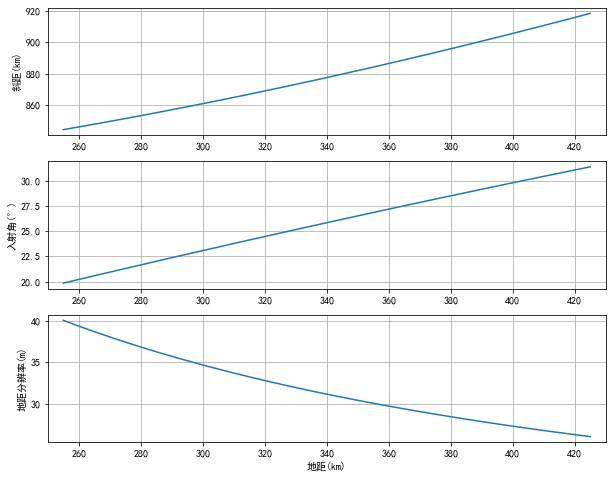

In [3]:
#%% 画图
#% 画图， 图片设置
fig = plt.figure( figsize=(10, 8))#; set( h, 'position', [100,100,900,600]);
sub_row = 3; sub_col = 1; sub_count = 0;
#% 作图
sub_count = sub_count + 1;  
plt.subplot( sub_row, sub_col, sub_count ); 
plt.plot( G_all/1e3, R0_all/1e3 ); plt.ylabel('斜距(km)'); plt.grid();plt.xlim(250,430)
sub_count = sub_count + 1;  
plt.subplot( sub_row, sub_col, sub_count ); 
plt.plot( G_all/1e3, thi_all*180/np.pi ); plt.ylabel('入射角(°)'); plt.grid(); plt.xlim(250,430)
sub_count = sub_count + 1;  
plt.subplot( sub_row, sub_col, sub_count ); 
plt.plot( G_all/1e3, dg_all ); plt.ylabel('地距分辨率(m)'); plt.grid(); plt.xlabel('地距(km)'); plt.xlim(250,430)
